In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector
from matplotlib.image import imread
from pywaffle import Waffle
from math import pi
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers

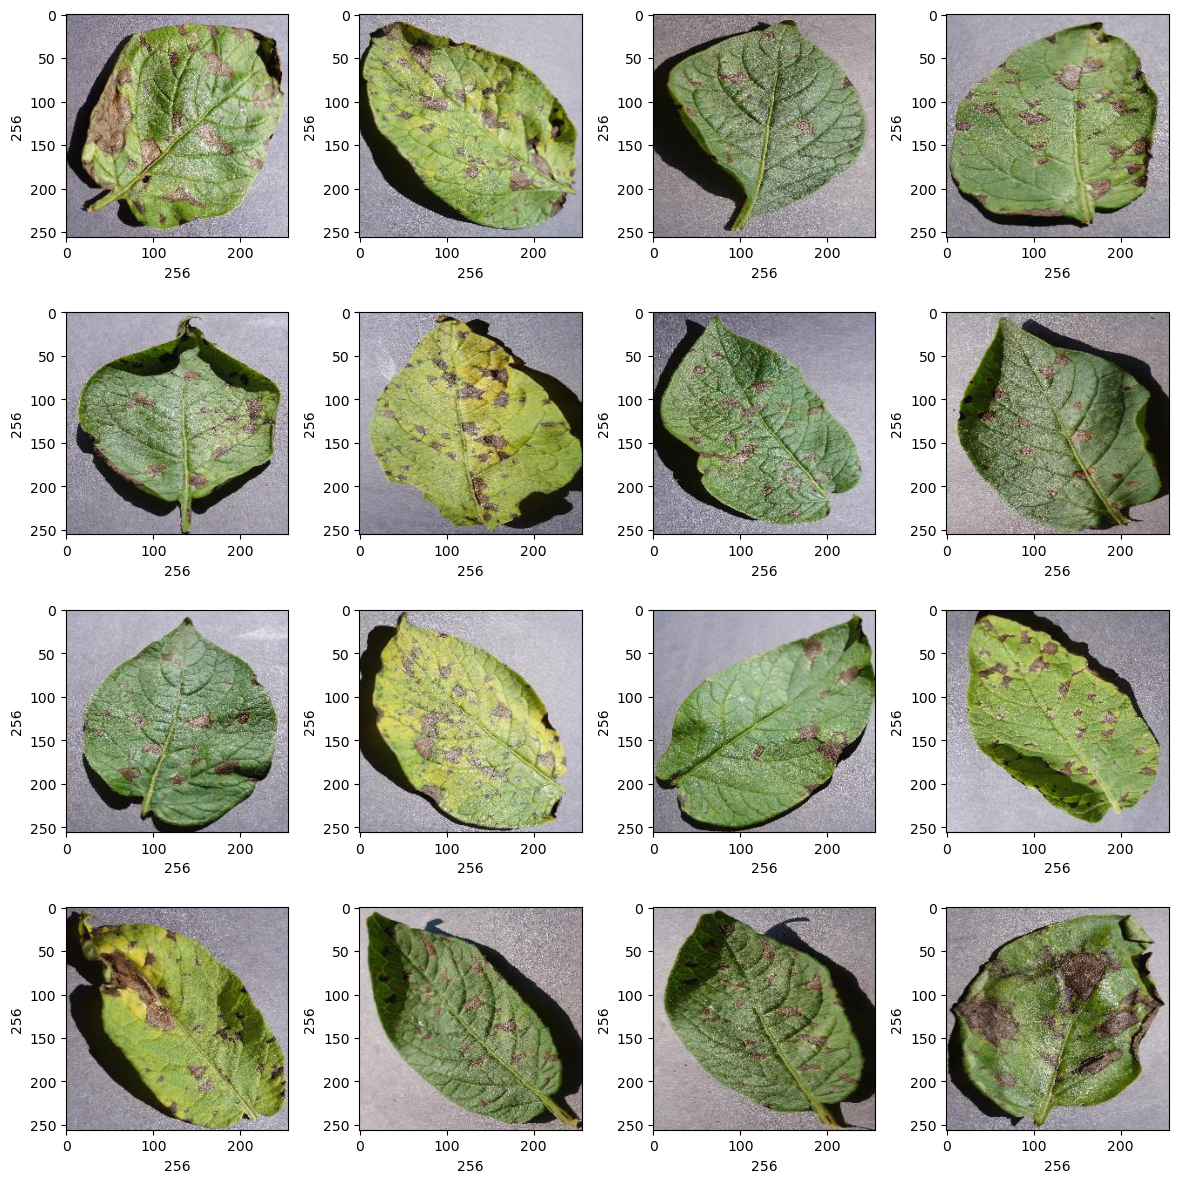

In [2]:
# Plotting 12 images to check dataset
#Now we will observe some of the iamges that are their in our dataset. We will plot 12 images here using the matplotlib library.
plt.figure(figsize=(12,12))
path = "D:/Plant_images/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [3]:
#Converting Images to array 
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [4]:
dir = "D:/Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
#Now we will convert all the images into numpy array.

for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [5]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

#it is a balanced dataset as you can see

0    300
1    300
2    300
dtype: int64

In [6]:
#Next we will observe the shape of the image.
image_list[0].shape

(256, 256, 3)

In [7]:
#Checking the total number of the images which is the length of the labels list.
label_list = np.array(label_list)
label_list.shape

(900,)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 


In [9]:
#Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))  # Added Conv2D layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))  # Added Conv2D layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))  # Added Conv2D layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3,3), activation = 'relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))  # Increased number of neurons in Dense layer
model.add(Dense(64, activation="relu"))   # Added another Dense layer
model.add(Dense(3, activation="softmax"))
model.summary()

C:\Users\Hp\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 85, 85, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 42, 42, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 5, 5, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 798,595 (3.05 MB)

 Trainable params: 798,595 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [13]:
#Next we will split the dataset into validation and training data.
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [14]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.3901 - loss: 1.0945 - val_accuracy: 0.5972 - val_loss: 1.0694
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.6272 - loss: 1.0671 - val_accuracy: 0.6042 - val_loss: 1.0314
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6349 - loss: 1.0261 - val_accuracy: 0.6111 - val_loss: 0.9616
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.6275 - loss: 0.9617 - val_accuracy: 0.6111 - val_loss: 0.8507
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.6435 - loss: 0.8537 - val_accuracy: 0.6111 - val_loss: 0.6976
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.6461 - loss: 0.7091 - val_accuracy: 0.8889 - val_loss: 0.5131
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.8554 - loss: 0.5494 - val_accuracy: 0.9167 - val_loss: 0.3430
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.8732 - loss: 0.4299 - val_accuracy: 0.9306 - val_loss: 0.2386
Epoch 9/

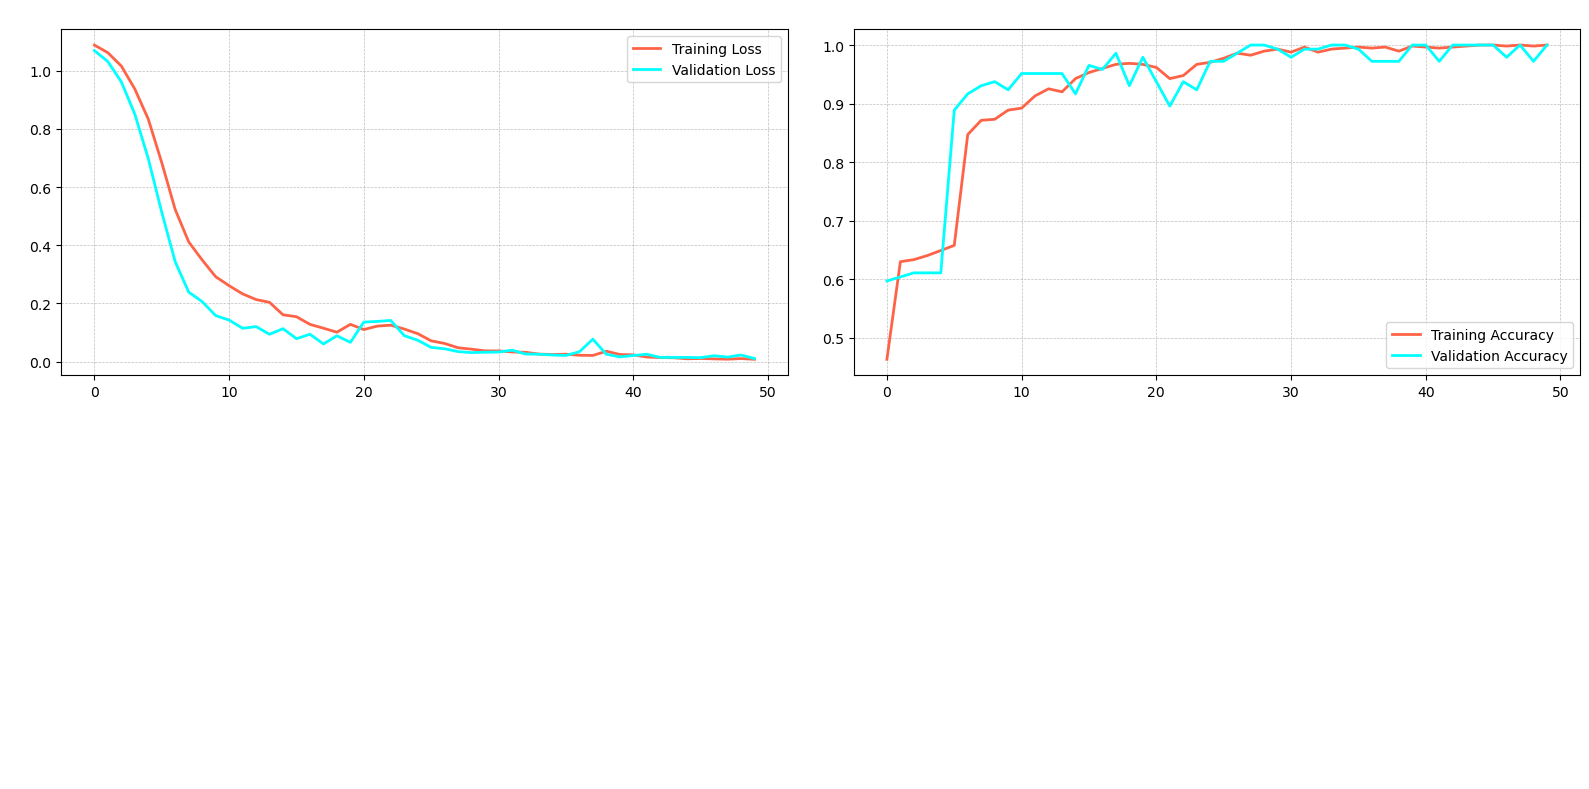

In [15]:
# Set cyberpunk-style colors
cyberpunk_red = '#FF6347'
cyberpunk_blue = '#00FFFF'
cyberpunk_green = '#00FF00'

# Plot training and validation loss values
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], color=cyberpunk_red, label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], color=cyberpunk_blue, label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss', color='white')
plt.xlabel('Epochs', color='white')
plt.ylabel('Loss', color='white')
plt.legend()
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Plot training and validation accuracy values
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], color=cyberpunk_red, label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], color=cyberpunk_blue, label='Validation Accuracy', linewidth=2)
plt.title('Training and Validation Accuracy', color='white')
plt.xlabel('Epochs', color='white')
plt.ylabel('Accuracy', color='white')
plt.legend()
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Add cyberpunk-style elements
plt.subplot(2, 2, 3)
plt.text(0.5, 0.5, 'Cyberpunk', color='white', fontsize=50, ha='center', va='center')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.text(0.5, 0.5, 'Future', color='white', fontsize=50, ha='center', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()


In [16]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")


[INFO] Calculating model accuracy
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 1.0000 - loss: 0.0069
Test Accuracy: 100.0


In [17]:
validation_accuracy = history.history['val_accuracy'][-1]
print("Validation Accuracy:", validation_accuracy)

Validation Accuracy: 1.0


In [18]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step


In [19]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight


In [20]:
# Load the leaf image
leaf_image_path = "D:/down2.jpg"
leaf_image = cv2.imread(leaf_image_path)

# Check if the image was loaded successfully
if leaf_image is None:
    print("Error: Unable to load the image.")
else:
    # Preprocess the image
    leaf_image = cv2.resize(leaf_image, (256, 256))
    leaf_image = leaf_image.astype('float16') / 255.0
    leaf_image = np.expand_dims(leaf_image, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(leaf_image)

    # Interpret prediction
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = all_labels[predicted_class_index]

    # Print the predicted class label
    print("Predicted Class:", predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Class: Tomato-Bacterial_spot


In [21]:
# Load the leaf image
leaf_image_path = "D:/down3.jpeg"
leaf_image = cv2.imread(leaf_image_path)

# Check if the image was loaded successfully
if leaf_image is None:
    print("Error: Unable to load the image.")
else:
    # Preprocess the image
    leaf_image = cv2.resize(leaf_image, (256, 256))
    leaf_image = leaf_image.astype('float16') / 255.0
    leaf_image = np.expand_dims(leaf_image, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(leaf_image)

    # Interpret prediction
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = all_labels[predicted_class_index]

    # Print the predicted class label
    print("Predicted Class:", predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Class: Corn-Common_rust
